Sven Rutsch & Christoph Blickle

# Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv("Kickstarter_Train.csv")

# Quick Data Overview

In [4]:
df.head()

,backers_count,category,converted_pledged_amount,country,created_at,currency,deadline,launched_at,staff_pick,state_changed_at,days_until_launch,days_until_success,days_total,days_diff_total_success,converted_goal_amount,blurb_length,name_length,state
0,7,crafts,139,GB,2014-11-24,GBP,2014-12-24,2014-11-24,0,2014-12-24,0,30,30,0,1308,129,46,0
1,0,journalism,0,CA,2014-12-04,CAD,2015-01-17,2014-12-18,0,2015-01-17,14,30,30,0,751,135,29,0
2,8,technology,585,US,2015-08-31,USD,2015-11-07,2015-10-07,0,2015-11-07,37,31,31,0,2500,135,30,0
3,2125,technology,357769,US,2017-02-08,USD,2017-07-27,2017-06-27,0,2017-07-27,139,30,30,0,100000,124,53,1
4,75,food,3091,US,2017-10-27,USD,2017-11-29,2017-10-29,0,2017-11-29,2,31,31,0,3000,76,40,1


In [5]:
df.describe().round()

,backers_count,converted_pledged_amount,staff_pick,days_until_launch,days_until_success,days_total,days_diff_total_success,converted_goal_amount,blurb_length,name_length,state
count,144496.0,144496.0,144496.0,144496.0,144496.0,144496.0,144496.0,144496.0,144496.0,144496.0,144496.0
mean,152.0,13407.0,0.0,47.0,32.0,32.0,-0.0,38822.0,112.0,35.0,1.0
std,937.0,87959.0,0.0,130.0,12.0,12.0,0.0,1135388.0,27.0,16.0,0.0
min,0.0,0.0,0.0,0.0,1.0,1.0,-38.0,0.0,1.0,1.0,0.0
25%,4.0,150.0,0.0,3.0,30.0,30.0,0.0,1500.0,101.0,22.0,0.0
50%,30.0,1774.0,0.0,11.0,30.0,30.0,0.0,4924.0,124.0,35.0,1.0
75%,94.0,7077.0,0.0,37.0,34.0,34.0,0.0,12000.0,132.0,49.0,1.0
max,105857.0,8596474.0,1.0,2593.0,93.0,93.0,0.0,132567974.0,151.0,85.0,1.0


In [26]:
#Data Timespan
print(df.launched_at.min())
print(df.launched_at.max())

2009-04-29
2019-03-06


# EDA

**Distribution of successful & non-successful projects**

In [16]:
#% of successful projects
df.state.value_counts()
(df.state.value_counts()[1] / (df.state.value_counts()[1] + df.state.value_counts()[0]) * 100).round()

61.0

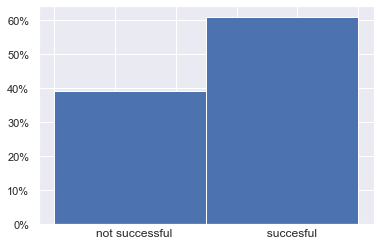

In [54]:
from matplotlib.ticker import PercentFormatter
plt.hist(df["state"], weights=np.ones(len(df["state"])) / len(df["state"]), bins=2, label=df["state"])#
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tick_params(labelbottom=False)
plt.xlabel("not successful                            succesful")
#plt.xticks(df["state"],['not successful','succesful'])
plt.show()

**Timeline**

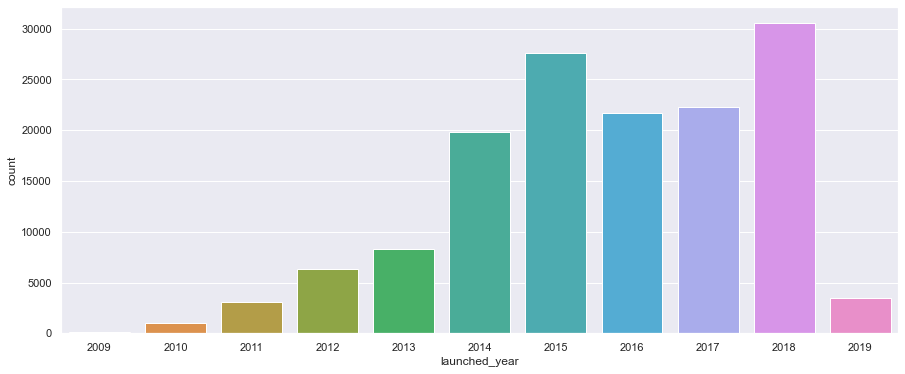

In [41]:
df['launched'] = pd.to_datetime(df['launched_at'])
df['launched_year'] = df.launched.dt.year

plt.subplots(figsize = (15,6))
sns.countplot(x="launched_year", data=df);

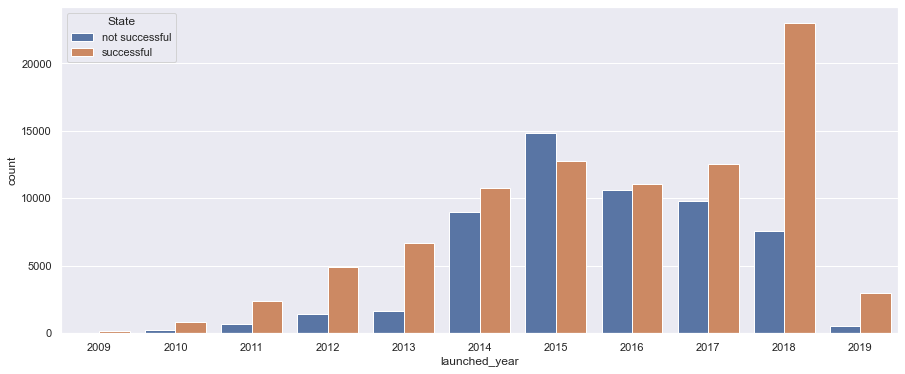

In [45]:
plt.subplots(figsize = (15,6))
sns.countplot(x="launched_year", hue="state", data=df);
plt.legend(title='State', loc='upper left', labels=['not successful', 'successful']);

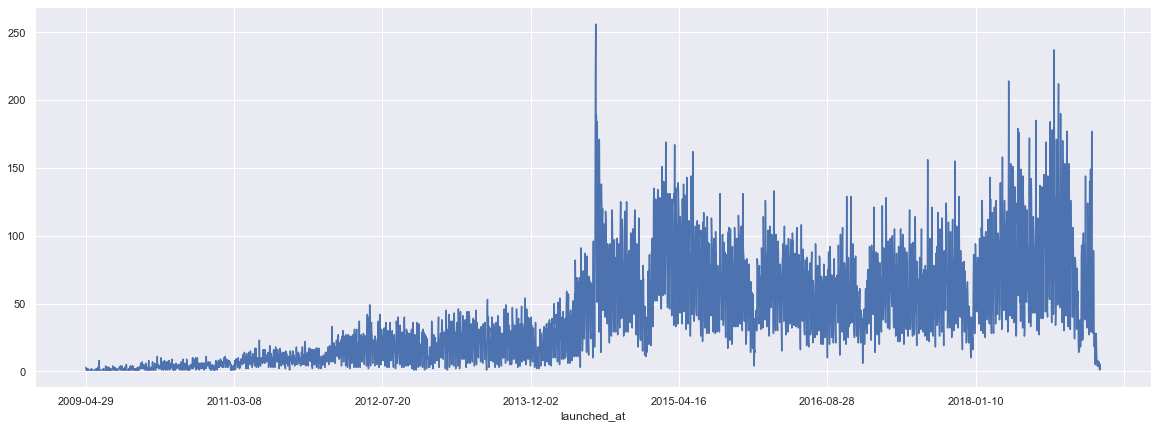

In [7]:
#https://matplotlib.org/3.3.1/gallery/text_labels_and_annotations/date.html
launched_at_count = df.groupby("launched_at")["launched_at"].count()

fig = launched_at_count.plot(kind="line", figsize=(20,7));
plt.show()

Strong increase to be seen from around 2013 onwards. Stagnation from 2014.

Around October conspicuities are to be recognized, since it breaks down strongly there.

**Category overview**

In [17]:
df.category.value_counts()

music           19429
film & video    19259
technology      14541
art             14360
publishing      14131
food            11181
games            9318
fashion          8049
comics           6127
design           5799
photography      5540
crafts           4949
theater          4869
journalism       4010
dance            2934
Name: category, dtype: int64

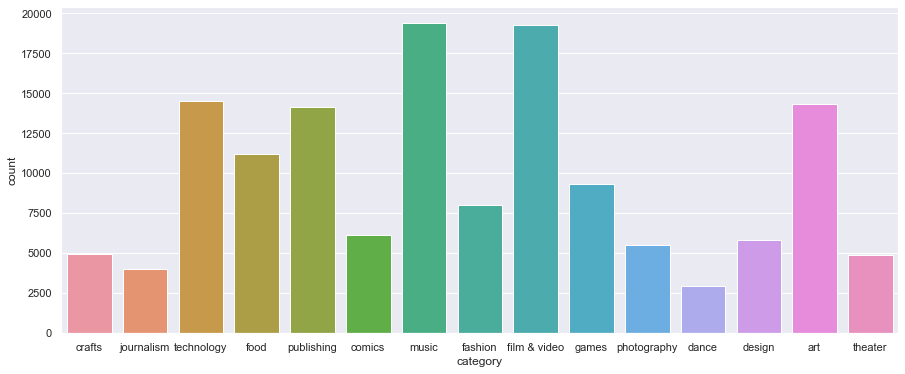

In [9]:
plt.subplots(figsize = (15,6))
sns.countplot(df.category);

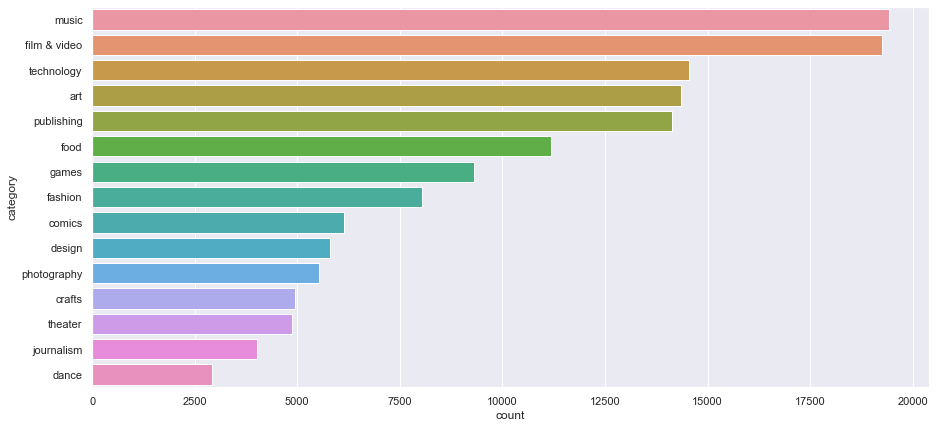

In [25]:
plt.subplots(figsize = (15,7))
sns.countplot(y=df.category, order = df['category'].value_counts().index);

**Countries**

In [25]:
len(df.country.value_counts())

22

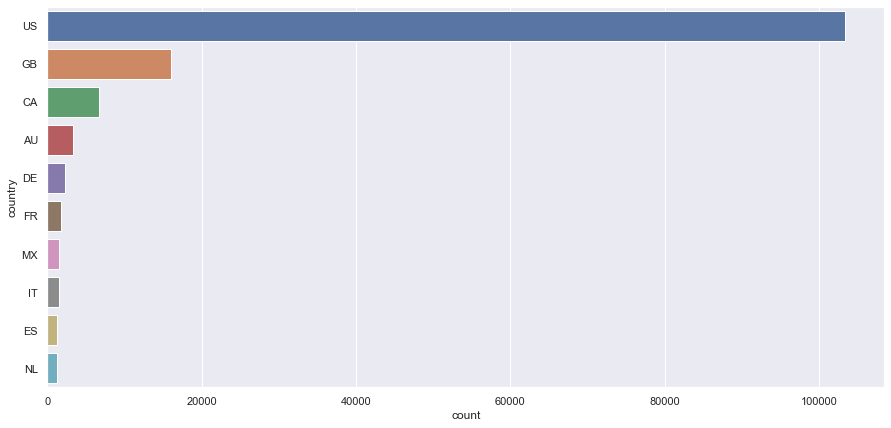

In [10]:
#Top 10 Countries (Distribution)
plt.subplots(figsize = (15,7))
sns.countplot(y=df.country, order = df['country'].value_counts().head(10).index);

By far the most projects come from the USA.

One reason could be that Kickstarter comes from the USA or perhaps the Americans have more entrepreneurial spirit. Or maybe it is much more difficult to get bank loans there.


**Money**

In [27]:
#Top 10 Goals 
df.converted_goal_amount.sort_values(ascending=False)[0:10]

70409     132567974
96230     113209128
107016    100000000
109076    100000000
144011    100000000
105919    100000000
52026     100000000
130742    100000000
38106     100000000
99839     100000000
Name: converted_goal_amount, dtype: int64

There a lot of unrealistic/"fun" goals, especially when we see how much money was really collected from the top projects

In [29]:
#Top 10 Pledges
df.converted_pledged_amount.sort_values(ascending=False)[0:10]

100517    8596474
73124     6333295
140119    6256244
43936     6256244
135840    5702153
98125     5545991
20842     5408916
126552    5333792
93003     5333792
52958     4236618
Name: converted_pledged_amount, dtype: int64

In [42]:
#Check differences between goal & pledged
df["goal_usd_pledged_diff"] = df.converted_pledged_amount - df.converted_goal_amount
df["goal_usd_pledged_diff"].describe().round()

count       144496.0
mean        -25415.0
std        1138222.0
min     -132567974.0
25%          -3538.0
50%             95.0
75%            968.0
max        7646474.0
Name: goal_usd_pledged_diff, dtype: float64

**Avg. usd spent per backer (per catergory)**

,dance,film & video,technology,theater,design,music,photography,food,fashion,publishing,art,crafts,games,journalism,comics
avg_usd_per_backer,69.0,69.0,66.0,63.0,60.0,56.0,55.0,54.0,51.0,48.0,46.0,38.0,37.0,35.0,34.0


Text(0, 0.5, 'Average usd pledged per backer')

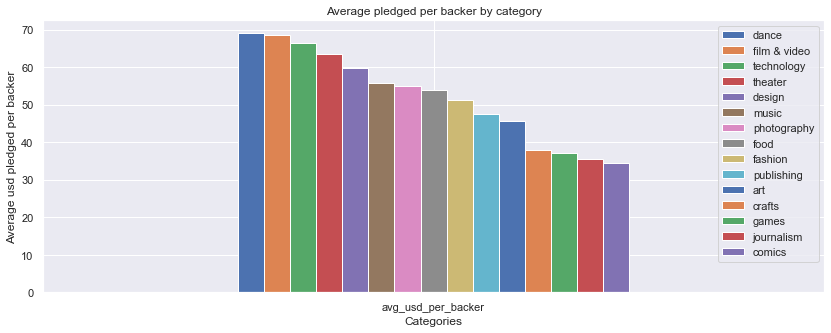

In [11]:
df["avg_usd_per_backer"] = df.converted_pledged_amount / df.backers_count

#Get a list of all categories 
cat_list = list(df['category'].unique())

#Create a table of the average usd spent per backer for every category
pledge_table = dict()
for category in cat_list:
    cat_df = df[df['category'] == category]
    pledge_table.update({category : cat_df['avg_usd_per_backer'].median()})

#Visualize the results
pledge_df = pd.DataFrame(pledge_table, index=['avg_usd_per_backer'])
pledge_df.sort_values('avg_usd_per_backer', axis=1, inplace=True, ascending=False)
display(pledge_df.head().round())
ax = pledge_df.plot(kind='bar', 
                    title='Average pledged per backer by category', 
                    rot=0, figsize=(14,5))
ax.set_xlabel('Categories')
ax.set_ylabel('Average usd pledged per backer')

**Check staff_pick** 

Deeper insights into staff picked projects

staff_pick = How can I get my project featured by Kickstarter?

"These are questions we hear often from our creator community. Our team is always on the lookout for exceptional projects, and when we find one, we share our enthusiasm by giving it a Projects We Love badge, and by showcasing select projects on our homepage and in our newsletters."

In [34]:
#Only view projects that were picked by kickstater staff -> got featured
staff_pick1_state = df.query("staff_pick == 1")

In [35]:
staff_pick1_state.describe().round()

,backers_count,converted_pledged_amount,staff_pick,days_until_launch,days_until_success,days_total,days_diff_total_success,converted_goal_amount,blurb_length,name_length,state,avg_usd_per_backer
count,19385.0,19385.0,19385.0,19385.0,19385.0,19385.0,19385.0,19385.0,19385.0,19385.0,19385.0,19376.0
mean,509.0,44773.0,1.0,64.0,32.0,32.0,-0.0,20724.0,114.0,38.0,1.0,96.0
std,2228.0,193151.0,0.0,153.0,9.0,9.0,0.0,89259.0,24.0,16.0,0.0,133.0
min,0.0,0.0,1.0,0.0,1.0,1.0,-5.0,1.0,1.0,3.0,0.0,1.0
25%,71.0,4288.0,1.0,8.0,30.0,30.0,0.0,3500.0,104.0,25.0,1.0,41.0
50%,151.0,10835.0,1.0,22.0,30.0,30.0,0.0,8630.0,124.0,39.0,1.0,65.0
75%,349.0,28618.0,1.0,56.0,33.0,33.0,0.0,20000.0,132.0,51.0,1.0,106.0
max,105857.0,8596474.0,1.0,2593.0,91.0,91.0,0.0,10000000.0,150.0,85.0,1.0,4100.0


In [13]:
(df.staff_pick.value_counts()[1] / df.staff_pick.value_counts()[0] * 100).round(4)

15.4942

15% of the projects were picked by kickstarter staff

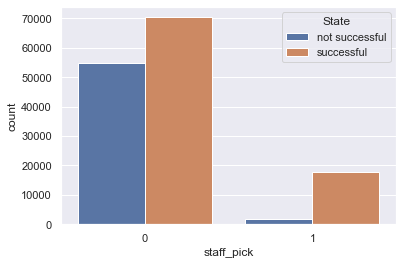

In [16]:
#How many projects will be successful if they are featured on Kickstarter?
sns.countplot(x=df.staff_pick, hue=df.state);
plt.legend(title='State', loc='upper right', labels=['not successful', 'successful']);

In [38]:
(staff_pick1_state.state.value_counts()[0] / staff_pick1_state.state.value_counts()[1] * 100).round()

10.0

In [39]:
#~10% of the projects which were featured failed -> so ~90% will succeed 
((1 - staff_pick1_state.state.value_counts()[0] / staff_pick1_state.state.value_counts()[1]) * 100).round()

90.0

In [40]:
#If state = 1 & staff_pick = 1, do we get more money than we have set as our goal? 
staff_pick1_state1 = df.query("staff_pick == 1 and state ==1")
staff_pick1_state1.describe().round(2)

,backers_count,converted_pledged_amount,staff_pick,days_until_launch,days_until_success,days_total,days_diff_total_success,converted_goal_amount,blurb_length,name_length,state,avg_usd_per_backer
count,17670.00,17670.00,17670.0,17670.00,17670.00,17670.00,17670.00,17670.00,17670.00,17670.00,17670.0,17670.00
mean,550.31,48307.49,1.0,64.21,31.71,31.71,-0.00,18665.06,114.32,37.66,1.0,96.84
std,2328.29,201821.08,0.0,153.93,9.32,9.32,0.04,49358.94,23.91,15.48,0.0,135.17
min,2.00,26.00,1.0,0.00,1.00,1.00,-5.00,1.00,1.00,3.00,1.0,1.16
25%,81.00,5093.75,1.0,8.00,30.00,30.00,0.00,3300.00,104.00,25.00,1.0,42.16
50%,167.00,11892.00,1.0,22.00,30.00,30.00,0.00,8000.00,124.00,39.00,1.0,65.45
75%,381.00,31052.25,1.0,56.00,33.00,33.00,0.00,20000.00,132.00,52.00,1.0,106.64
max,105857.00,8596474.00,1.0,2593.00,91.00,91.00,0.00,2000000.00,150.00,85.00,1.0,4100.29


In [43]:
#update the query with the new column "goal_usd_pledged_diff"
staff_pick1_state1 = df.query("staff_pick == 1 & state ==1")
staff_pick1_state1.describe().round(2)
staff_pick1_state1.goal_usd_pledged_diff.describe().round(2)

count      17670.00
mean       29642.43
std       175503.94
min        -5284.00
25%          534.00
50%         1896.50
75%         7861.25
max      7646474.00
Name: goal_usd_pledged_diff, dtype: float64

In [50]:
#Differences between backers_count & avg_usd_per_backer when state = 1 & staff_pick = 1 and with the normal dataset
print(staff_pick1_state1.backers_count.median() - df.backers_count.median()," more backers")
print((staff_pick1_state1.avg_usd_per_backer.median() - df.avg_usd_per_backer.median())," $ more spending per backer")

137.0  more backers
13.689370968631124  $ more spending per backer


* 15% of the projects will be picked by staff to get featured 
* 90% of featured projects succeed 
* On average, these projects received 25,000 dollar more than expected (goal = 21,000 dollar) 
* Also on average: 137 more backers and $14 more per backer

-> Staff_pick is a strong indicator for success 

**Check successful projects**

In [51]:
state1 = df.query("state == 1")
state1.describe().round()

,backers_count,converted_pledged_amount,staff_pick,days_until_launch,days_until_success,days_total,days_diff_total_success,converted_goal_amount,blurb_length,name_length,state,avg_usd_per_backer,goal_usd_pledged_diff
count,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0,88098.0
mean,242.0,21286.0,0.0,51.0,31.0,31.0,-0.0,8915.0,112.0,37.0,1.0,92.0,12372.0
std,1190.0,111843.0,0.0,132.0,11.0,11.0,0.0,25336.0,26.0,15.0,0.0,134.0,99753.0
min,1.0,1.0,0.0,0.0,1.0,1.0,-38.0,0.0,1.0,2.0,1.0,1.0,-5284.0
25%,32.0,1746.0,0.0,5.0,29.0,29.0,0.0,1000.0,100.0,24.0,1.0,39.0,159.0
50%,69.0,4894.0,0.0,15.0,30.0,30.0,0.0,3500.0,123.0,37.0,1.0,62.0,610.0
75%,161.0,12652.0,0.0,42.0,32.0,32.0,0.0,9812.0,132.0,51.0,1.0,102.0,2486.0
max,105857.0,8596474.0,1.0,2593.0,93.0,93.0,0.0,2000000.0,151.0,85.0,1.0,9606.0,7646474.0


In [52]:
state0 = df.query("state == 0")
state0.describe().round()

,backers_count,converted_pledged_amount,staff_pick,days_until_launch,days_until_success,days_total,days_diff_total_success,converted_goal_amount,blurb_length,name_length,state,avg_usd_per_backer,goal_usd_pledged_diff
count,56398.0,56398.0,56398.0,56398.0,56398.0,56398.0,56398.0,56398.0,56398.0,56398.0,56398.0,45121.0,56398.0
mean,12.0,1099.0,0.0,42.0,35.0,35.0,-0.0,85539.0,113.0,33.0,0.0,58.0,-84440.0
std,49.0,5828.0,0.0,125.0,13.0,13.0,0.0,1816106.0,27.0,16.0,0.0,142.0,1816060.0
min,0.0,0.0,0.0,0.0,1.0,1.0,-18.0,1.0,1.0,1.0,0.0,0.0,-132567974.0
25%,1.0,1.0,0.0,2.0,30.0,30.0,0.0,2500.0,103.0,19.0,0.0,10.0,-19999.0
50%,3.0,56.0,0.0,7.0,30.0,30.0,0.0,7000.0,125.0,31.0,0.0,30.0,-6176.0
75%,9.0,443.0,0.0,27.0,40.0,40.0,0.0,22000.0,132.0,46.0,0.0,62.0,-2000.0
max,4435.0,607628.0,1.0,2126.0,92.0,92.0,0.0,132567974.0,150.0,85.0,0.0,10000.0,7891.0


How does a successful project on kickstarter looks like? 
* 3,500 dollar goal (not successful = 7,000 dollar) 
* 4,900 dollar reached
* 69 backers 
* 62 dollar per backer

→ 50% of the project goals are between 1,000 - 10,000 dollar


In [54]:
#How much % of the projects goals are between 1k - 10k
state1.query("converted_goal_amount > 1000 and converted_goal_amount < 10000").shape[0] / state1.shape[0] * 100

49.838815864151286

In [56]:
#How much % of the projects got more than 100k?
state1.query("converted_pledged_amount > 100000").shape[0] / df.shape[0] * 100

2.1038644668364523

In [57]:
#Top 10 projects with the most money 
state1.sort_values(by="converted_pledged_amount", ascending=False)[0:10]

,backers_count,category,converted_pledged_amount,country,created_at,currency,deadline,launched_at,staff_pick,state_changed_at,days_until_launch,days_until_success,days_total,days_diff_total_success,converted_goal_amount,blurb_length,name_length,state,avg_usd_per_backer,goal_usd_pledged_diff
100517,63416,games,8596474,US,2012-05-15,USD,2012-08-09,2012-07-10,1,2012-08-09,56,30,30,0,950000,127,38,1,135.556863,7646474
73124,69320,games,6333295,US,2015-06-02,USD,2015-07-18,2015-06-16,1,2015-07-18,14,32,32,0,2000000,76,9,1,91.363171,4333295
140119,41939,games,6256244,GB,2018-11-09,GBP,2018-12-28,2018-12-05,1,2018-12-28,26,23,23,0,53027,133,33,1,149.174849,6203217
43936,41939,games,6256244,GB,2018-11-09,GBP,2018-12-28,2018-12-05,1,2018-12-28,26,23,23,0,53027,133,33,1,149.174849,6203217
135840,91585,film & video,5702153,US,2011-11-04,USD,2013-04-13,2013-03-13,1,2013-04-13,495,31,31,0,2000000,125,31,1,62.260774,3702153
98125,64867,games,5545991,US,2015-05-02,USD,2015-06-13,2015-05-11,1,2015-06-13,9,33,33,0,500000,110,33,1,85.497880,5045991
20842,105857,technology,5408916,US,2014-04-23,USD,2014-07-02,2014-05-28,1,2014-07-02,35,35,35,0,1000000,135,55,1,51.096441,4408916
126552,26828,technology,5333792,US,2017-03-06,USD,2017-04-27,2017-03-23,0,2017-04-27,17,35,35,0,50000,131,60,1,198.814373,5283792
93003,26828,technology,5333792,US,2017-03-06,USD,2017-04-27,2017-03-23,0,2017-04-27,17,35,35,0,50000,131,60,1,198.814373,5283792
52958,5946,technology,4236618,US,2016-12-09,USD,2017-11-03,2017-09-19,1,2017-11-03,284,45,45,0,200000,129,38,1,712.515641,4036618


**Success per Category** 

,dance,comics,theater,publishing,design,music,games,fashion,film & video,art,photography,crafts,technology,food,journalism
cat_success_percent,84.0,84.0,74.0,73.0,71.0,69.0,66.0,65.0,61.0,61.0,55.0,52.0,42.0,37.0,34.0


Text(0, 0.5, 'success_per_cat')

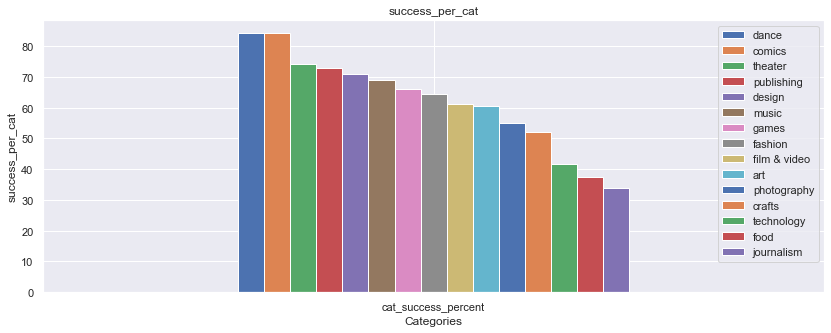

In [17]:
#get the amount of projects from each category 
cat_count = df["category"].value_counts()

#only show the amount of successful projects per category 
cat_success = df[df["state"] == 1]
cat_success_count = cat_success["category"].value_counts()

#get the successful rate in percent for each category 
cat_success_percent = (cat_success_count / cat_count) * 100

#Get a list of all categories 
cat_list_sorted = list(df['category'].unique())
cat_list_sorted.sort()
cat_list_sorted

#Create a table of the average usd spent per backer for every category
cat_success_table = dict()
for idx, category in enumerate(cat_list_sorted):
    cat_df = df[df['category'] == category]
    cat_success_table.update({category : cat_success_percent[idx]})

#Visualize the results
#Table
cat_success_df = pd.DataFrame(cat_success_table, index=['cat_success_percent'])
cat_success_df.sort_values('cat_success_percent', axis=1, inplace=True, ascending=False)
display(cat_success_df.head().round())

#Plot
ax = cat_success_df.plot(kind='bar', 
                    title='success_per_cat', 
                    rot=0, figsize=(14,5))
ax.set_xlabel('Categories')
ax.set_ylabel('success_per_cat')

**Goal & Pledged per Category**

In [62]:
#Median goal per Category of succesful projects
#get the amount of projects from each category 
cat_count = df["category"].value_counts()

#only show the amount of successful projects per category 
cat_success = df[df["state"] == 1]
cat_success_count = cat_success["category"].value_counts()

#get the median goal for each category 
cat_success_mgoal = (cat_success_count / cat_count) * 100
#cat_success_mgoal.sort_values(ascending=False).round(2)

,technology,food,film & video,design,games,journalism,fashion,music,photography,publishing,dance,theater,comics,art,crafts
median_goal,15000.0,10000.0,5500.0,5000.0,5000.0,5000.0,4000.0,3827.0,3532.0,3500.0,3260.0,3000.0,2600.0,2250.0,1549.0
median_pledged,1628.0,550.0,2086.0,4850.0,3498.0,117.0,1676.0,2345.0,987.0,2476.0,3004.0,2191.0,2852.0,922.0,447.0


Text(0, 0.5, 'Median goal per Category')

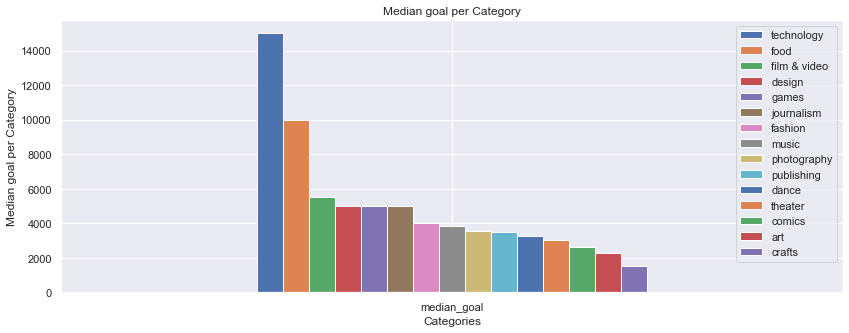

In [19]:
#Get a list of all categories
cat_list_sorted = list(df['category'].unique())
cat_list_sorted.sort()
cat_list_sorted

#Create a table with categories & converted_goal_amount median
cat_mgoal_table = dict()
for idx, category in enumerate(cat_list_sorted):
    cat_df = df[df['category'] == category]
    cat_mgoal_table.update({category : cat_df.converted_goal_amount.median()})
    
cat_mpledged_table = dict()
for idx, category in enumerate(cat_list_sorted):
    cat_df = df[df['category'] == category]
    cat_mpledged_table.update({category : cat_df.converted_pledged_amount.median()})

#Visualize the results
#Table
cat_mgoal_df = pd.DataFrame(cat_mgoal_table, index=['median_goal'])
cat_mpledged_df = pd.DataFrame(cat_mpledged_table, index=['median_pledged'])
cat_mgoal_df.sort_values('median_goal', axis=1, inplace=True, ascending=False)

#join both dataframes
cat_medians_df = cat_mgoal_df.append(cat_mpledged_df)
display(cat_medians_df.head().round())

#Plot median gaol
ax = cat_mgoal_df.plot(kind='bar', 
                    title='Median goal per Category', 
                    rot=0, figsize=(14,5))
ax.set_xlabel('Categories')
ax.set_ylabel('Median goal per Category')

Text(0, 0.5, 'Median pledged per Category')

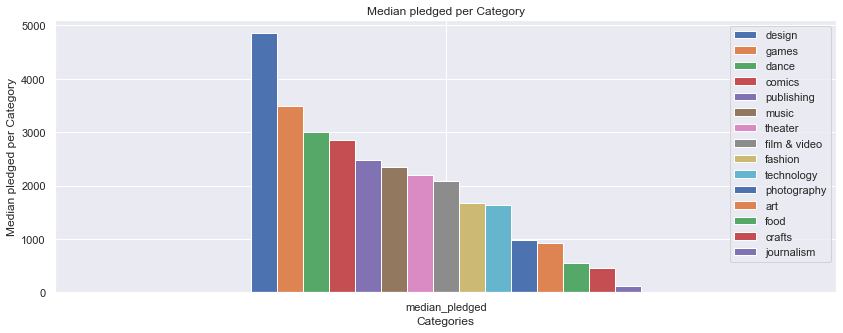

In [20]:
#Plot median pledged
cat_mpledged_df.sort_values('median_pledged', axis=1, inplace=True, ascending=False)

ax = cat_mpledged_df.plot(kind='bar', 
                    title='Median pledged per Category', 
                    rot=0, figsize=(14,5))
ax.set_xlabel('Categories')
ax.set_ylabel('Median pledged per Category')

In [22]:
#Create a table for the differences between goal & pledged 
cat_medians_diff_table = []
for i in range(len(cat_list_sorted)):
    cat_medians_diff_table.append(cat_medians_df.iloc[1,i] - cat_medians_df.iloc[0,i])
    
cat_medians_diff_table_dic = dict()
for idx, category in enumerate(list(cat_medians_df.columns)):
    cat_df = df[df['category'] == category]
    cat_medians_diff_table_dic.update({category : cat_medians_diff_table[idx]})


cat_medians_diff_df = pd.DataFrame(cat_medians_diff_table_dic, index=["median_diff"])
cat_medians_df = cat_medians_df.append(cat_medians_diff_df)
cat_medians_df

,technology,food,film & video,design,games,journalism,fashion,music,photography,publishing,dance,theater,comics,art,crafts
median_goal,15000.0,10000.0,5500.0,5000.0,5000.0,5000.0,4000.0,3827.0,3532.5,3500.0,3260.0,3000.0,2600.0,2250.0,1549.0
median_pledged,1628.0,550.0,2086.0,4850.0,3498.5,117.0,1676.0,2345.0,987.0,2476.0,3004.5,2191.0,2852.0,922.5,447.0
median_diff,-13372.0,-9450.0,-3414.0,-150.0,-1501.5,-4883.0,-2324.0,-1482.0,-2545.5,-1024.0,-255.5,-809.0,252.0,-1327.5,-1102.0


Considering the median, only comics get more money than their stated goal

Text(0, 0.5, 'Median diff. per Category')

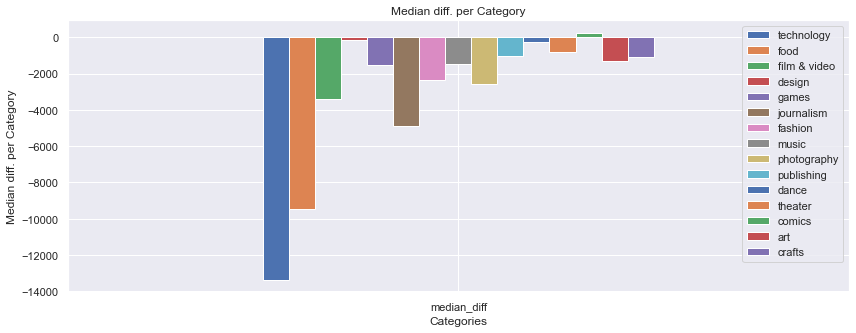

In [23]:
#Plot the diff. between goal & pledged 
#cat_medians_diff_df.sort_values('median_diff', axis=1, inplace=True, ascending=False)

ax = cat_medians_diff_df.plot(kind='bar', 
                    title='Median diff. per Category', 
                    rot=0, figsize=(14,5))
ax.set_xlabel('Categories')
ax.set_ylabel('Median diff. per Category')

# Recommendations

* Don’t expect too much → just 25% of the projects got more than 7,000 dollar
* Set a realistic goal - not too high (median of succesful projects was 3,500 dollar)
* Be aware of the different chances of success per category 
* Try to get featured (hints: https://www.kickstarter.com/blog/how-to-get-featured-on-kickstarter?lang=en) 
